# 𝐵𝑒𝑟𝑛𝑠𝑡𝑒𝑖𝑛 𝑉𝑎𝑧𝑖𝑟𝑎𝑛𝑖
<div class="alert alert-block alert-info">
<b>Note:</b>
In this workshop you will implement the $Bernstein$ $Vazirani$ algorithm using $Qiskit$ $Terra$ and $Qiskit$ $Aqua$ to find a secret number. 

## Introduction
<div class="alert alert-block alert-info">
<b>Note:</b>
The Bernstein-Vazirani algorithm deals with finding a hidden integer $c \in \{0,1\}^n$ from an oracle $f_c$ that returns a bit $c \cdot x \equiv \sum_i c_i x_i\mod 2 $ upon receiving an input $x \in \{0,1\}^n$. A classical oracle returns $f_c(x) = c \cdot x \mod 2$ given an input $x$.

Meanwhile, a quantum oracle behaves similarly but can be queried with superposition of input $x$'s. 

Classically, the hidden integer $c$ can be revealed by querying the oracle with $x = 1, 2, \ldots, 2^i, \ldots, 2^{n-1}$, where each query reveals the $i$-th bit of $c$ (or, $c_i$). For example, with $x=1$ one can obtain the least significant bit of $c$, and so on. 

This turns out to be an optimal strategy; any classical algorithm that finds the hidden integer with high probability must query the oracle $\Omega(n)$ times. However, given a corresponding quantum oracle, the hidden integer can be found with only $1$ query using the Bernstein-Vazirani algorithm. 

The algorithm finds the unknown bit string $c$ in a singleshot.
In the oracle, $c$ can be encoded in a pattern of $CNOT$ gates, all of which target the ancilla qubit. 

## Import the necessary modules

In [8]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.10.0',
 'qiskit-aer': '0.3.2',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.3.3',
 'qiskit-aqua': '0.6.1',
 'qiskit': '0.13.0'}

In [9]:
from qiskit import *
%matplotlib inline 
#%matplotlib notebook
from qiskit.tools.visualization import plot_histogram, plot_state_city
import matplotlib.pyplot as plt
from qiskit import Aer
from qiskit import *
from qiskit.aqua import QuantumInstance
from qiskit.aqua import run_algorithm
from qiskit.aqua.algorithms import BernsteinVazirani
from qiskit.aqua.components.oracles import TruthTableOracle, LogicalExpressionOracle
from qiskit.tools.visualization import *
import math

### First Challenge using Aqua
<div class="alert alert-block alert-info">
<b>Note:</b>
You will use Qiskit Aqua to implement Bernstein-Vazirani algorythm. 
  - First you need to define the $Oracle$ function by using $TruthTableOracle$ or $LogicalExprexionOracle$ functions from $Aqua$
  - Then you will invoke the $BernsteinVazirani$ function to generate the circuit 
  - finaly you will run the circuit on the $Aer$ $qasm_simulator$

First, choose a $secret$ integer that you will try to find using the $Bernstein$ $Vazirani$ algorithm

In [10]:
s='110' # The secret number

###  Truth table
<div class="alert alert-block alert-info">
<b>Note:</b>
You need first to create the $oracle$ that will encode the $secret$ $number$ you selected. This can be done by using `TruthTableOracle` or `LogicalExprexionOracle` functions provided by Aqua.  Let's experiment it.

The $truthtable$ bitstring can be defined by using the function : 
$f(x)$ $=$ $\ \ c\ . \ x  \ ( mod 2)$   $ \ \ $   with $c$ being the secret number and $x$ the $n$ elements applied. 

$$110 * 000 (mod2) --> 0$$ 
$$110 * 001 (mod2) --> 0$$
$$110 * 010 (mod2) --> 1$$
$$110 * 011 (mod2) --> 1$$
$$110 * 100 (mod2) --> 1$$
$$110 * 101 (mod2) --> 1$$
$$110 * 110 (mod2) --> 0$$
$$110 * 111 (mod2) --> 0$$

In Our example the Truthtable output string would be `00111100`


Define your $TruthTable$ based on your $secret$ $number$.

In [3]:
# define your TruthTable bitstring and put it in a variable 

bitstr = .....

Now you need to create the $oracle$ circuit associated to the truth table. This is done using Aqua $TruthTableOracle$ function

In [273]:
# Pass the bistring to the TruthTableOracle function with optimization=True.  
 
oracle = .....


In [5]:
# Draw the Oracle circuit. You can use the methods `.circuit.draw()` to your  oracle  



In [7]:
# Apply the `BernsteinVazirani` function to generate the full circuit of the algorithm.  
bv = ...... 

# Set the Aer qasm_simulator as backend
backend = ....

# Execute the circuit using the Aer backend. Perform 1024 shots and put the output in a variable "result" 

result = .... 


In [12]:
# Print the result bitstring 
print('The result bitstring computed using Bernstein-Vazirani is {}.'.format(result['result']))
assert(result['result'] == s)

### Seconda Challenge using Aqua
<div class="alert alert-block alert-info">
<b>Note:</b>
We give you a predefined Logical expression that must be encoded as an Oracle circuit for BernsteinVazirani algorithm. 
  - First you need to define the $Oracle$ function by using $LogicalExpressionOracleOracle$ function from $Aqua$
  - Then you will invoke the $BernsteinVazirani$ function to generate the circuit 
  - finaly you will run the circuit on the $Aer$ $qasm_simulator$

In [275]:
# We give you the following Logical expression
expr='Or(And(v0,v1,v2,v3),And(v0,~v1,v2,v3),And(~v0,v1,~v2,v3),And(~v0,~v1,~v2,v3),And(~v0,v1,v2,~v3),And(v0,v1,~v2,v3),And(v0,v1,~v2,~v3),And(v0,~v1,~v2,~v3))'

# Create the associated Oracle using the Aqua function `LogicalExpressionOracle` and option parameter `optimization=True`

oracle = .....

In [ ]:
# Draw the Oracle circuit using the methods .circuit.draw() 


In [276]:
# Apply the `BernsteinVazirani` function to generate the full circuit of the algorithm. 
bv = ......  


# Execute the circuit using the Aer backend. Perform 1024 shots and put the output in a variable "result" 

result = .... 



In [ ]:
# Print the result bitstring 
print('The result bitstring computed using Bernstein-Vazirani is {}.'.format(result['result']))


# Solutions


### First Challenge solution
<div class="alert alert-success">
  <strong>Here below you'll find the Solution for the "first Challenge"</strong> 
</div>

In [13]:
s='1101' # The secret number

###  Truth table
<div class="alert alert-success">
  <strong>Truth table</strong> 
</div>

In [18]:
# for each number from 0 to 2^n -1, apply the oracle function, then 
truth_table_str=''
print('The Truthtable corresponding to the oracle is:','\n')
for i in range(2**len(s)):
    var=sum(list(map(int, list(bin(int(s,2) & i)[2:])))) % 2
    print('s.',format(i, '0{}b'.format(len(s))) ,var)
    truth_table_str += str(var)

The Truthtable corresponding to the oracle is: 

s. 0000 0
s. 0001 1
s. 0010 0
s. 0011 1
s. 0100 1
s. 0101 0
s. 0110 1
s. 0111 0
s. 1000 1
s. 1001 0
s. 1010 1
s. 1011 0
s. 1100 0
s. 1101 1
s. 1110 0
s. 1111 1


In [15]:
# pass the bistring of the oracle in the TruthTable oracle function with optimization=True to generate the oracle circuit 
oracle = TruthTableOracle(truth_table_str,optimization=True)

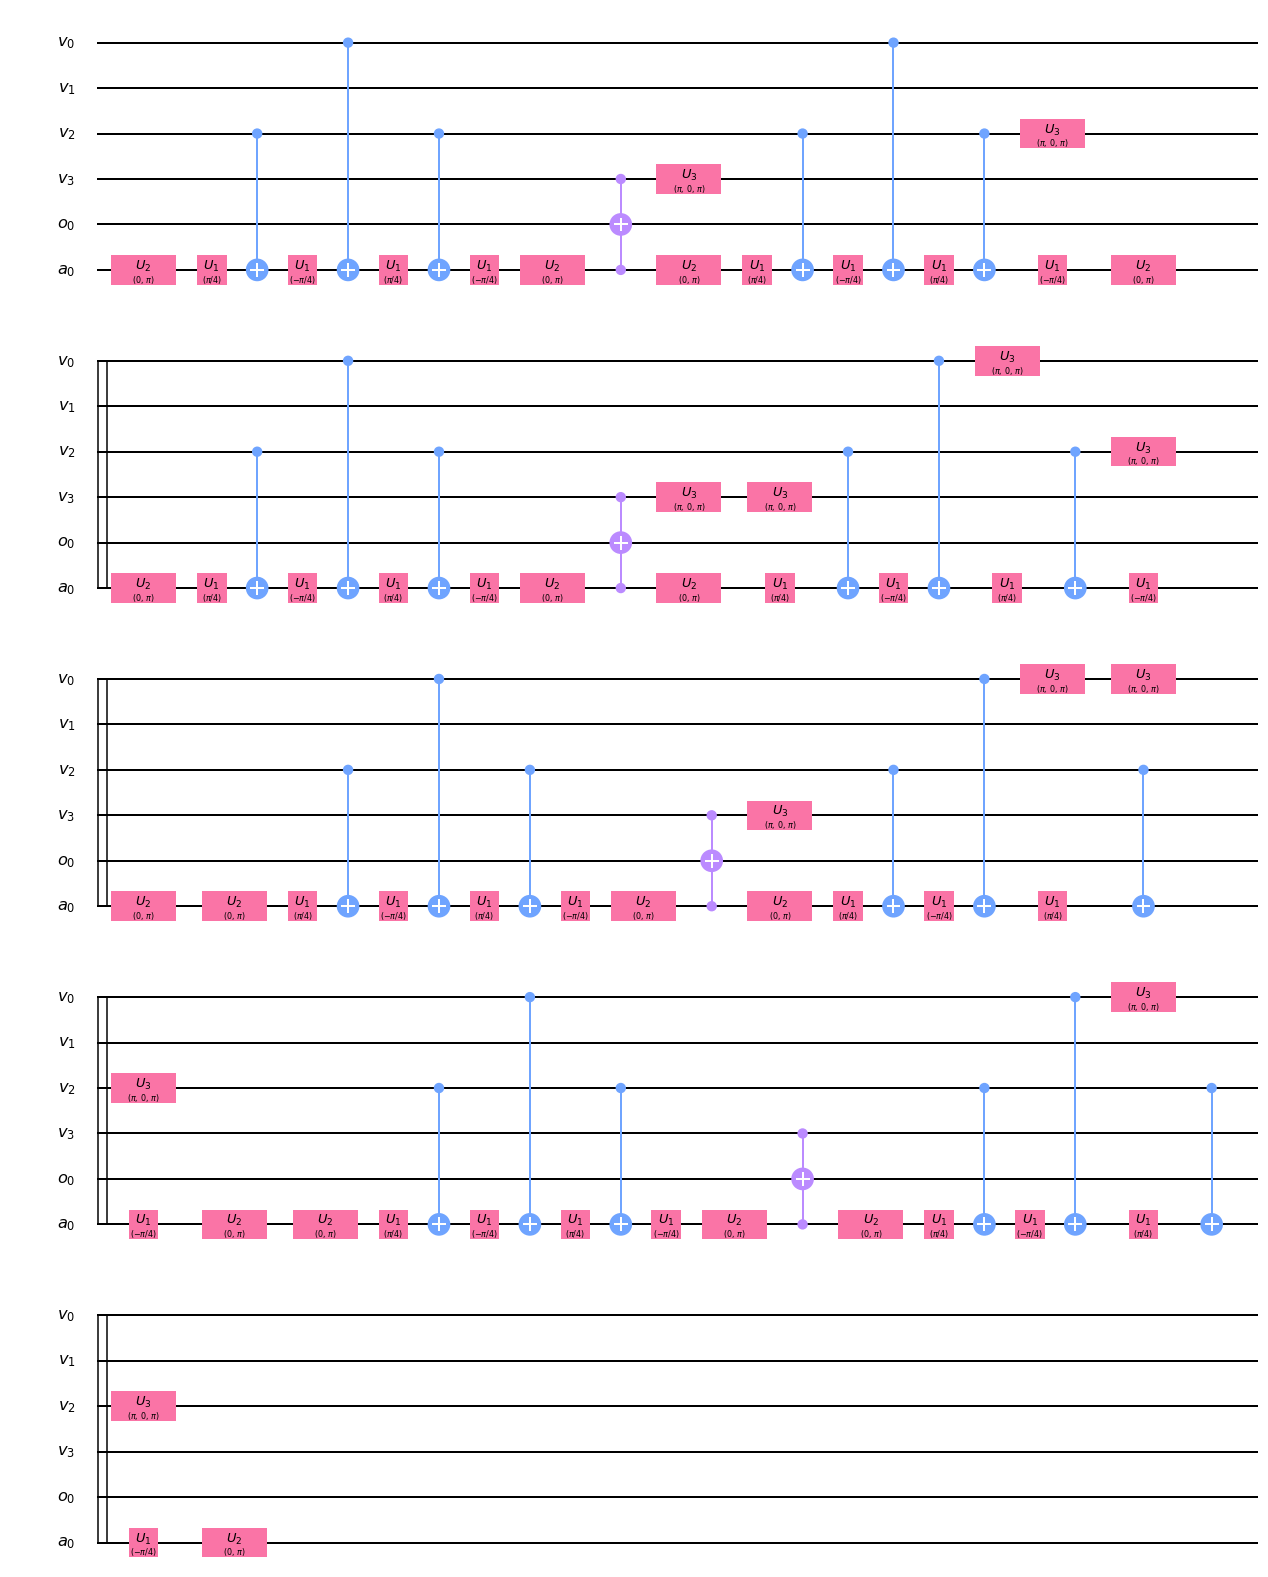

In [16]:
# draw the oracle circuit
oracle.circuit.draw(output='mpl')

In [21]:
# Create the BernsteinVazirani circuit
bv = BernsteinVazirani(oracle)

# Set the backend to qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# run the BernsteinVazirani algorithm using Aer backend. execute 1024 shots 
result = bv.run(QuantumInstance(backend, shots=1024))

# print the result bitstring
print('The result bitstring computed using Bernstein-Vazirani is {}.'.format(result['result']))
assert(result['result'] == s)

The result bitstring computed using Bernstein-Vazirani is 1101.


### Additional Challenge. Using Logical Expression solution
<div class="alert alert-success">
  <strong>Using Logical Expression</strong> 
</div>

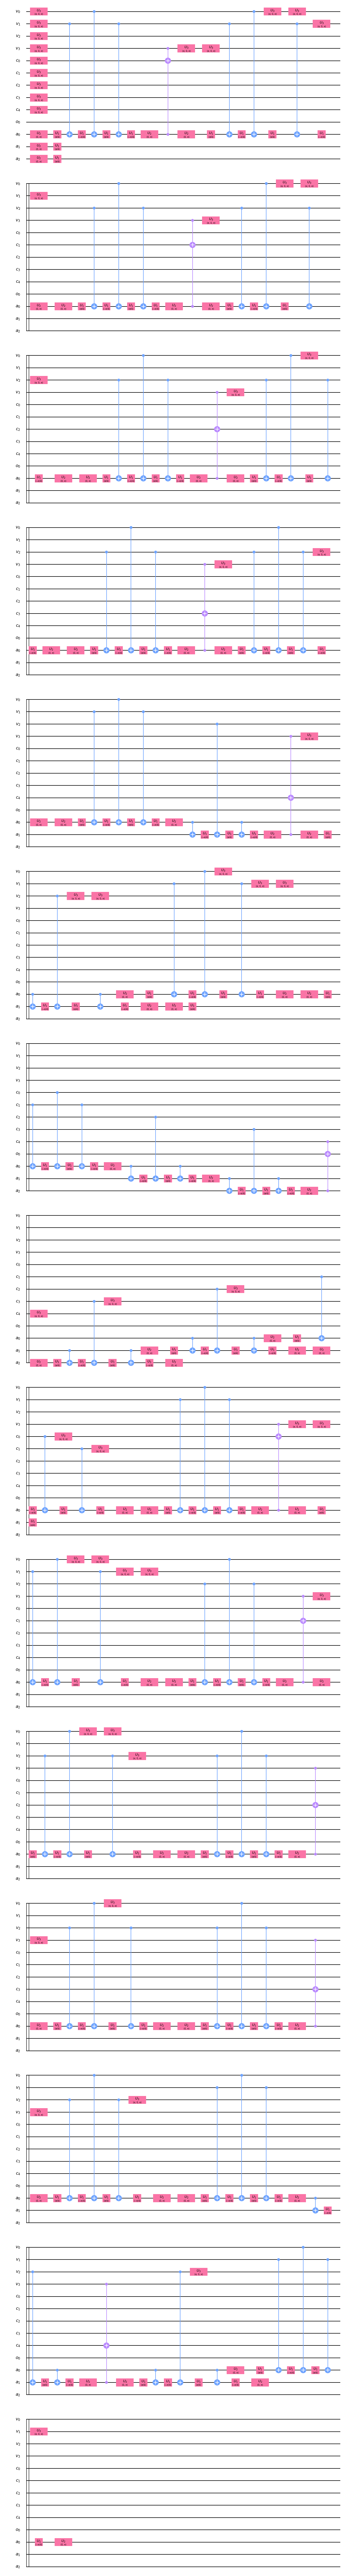

In [17]:
# The logical expression of the Oracle
expr='Or(And(v0,v1,v2,v3),And(v0,~v1,v2,v3),And(~v0,v1,~v2,v3),And(~v0,~v1,~v2,v3),And(~v0,v1,v2,~v3),And(v0,v1,~v2,v3),And(v0,v1,~v2,~v3),And(v0,~v1,~v2,~v3))'

# Create the oracle with the function LogicalExpressionOracle and optimization=True
oracle = LogicalExpressionOracle(expr,optimization=True)

# Draw the oracle circuit
oracle.circuit.draw(output='mpl')

In [20]:
# Create the BernsteinVazirani circuit
bv = BernsteinVazirani(oracle)

# Set the backend to qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# run the BernsteinVazirani algorithm using Aer backend. execute 1024 shots 
result = bv.run(QuantumInstance(backend, shots=1024))

# print the result bitstring
print('The result bitstring computed using Bernstein-Vazirani is {}.'.format(result['result']))
assert(result['result'] == s)

The result bitstring computed using Bernstein-Vazirani is 1101.
